###### import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv("Stock_PETR1(Petroleum).txt")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4087 entries, 0 to 4086
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    4087 non-null   int64  
 1   <TICKER>      4087 non-null   object 
 2   <DTYYYYMMDD>  4087 non-null   int64  
 3   <FIRST>       4087 non-null   float64
 4   <HIGH>        4087 non-null   float64
 5   <LOW>         4087 non-null   float64
 6   <CLOSE>       4087 non-null   float64
 7   <VALUE>       4087 non-null   int64  
 8   <VOL>         4087 non-null   int64  
 9   <OPENINT>     4087 non-null   int64  
 10  <PER>         4087 non-null   object 
 11  <OPEN>        4087 non-null   float64
 12  <LAST>        4087 non-null   float64
dtypes: float64(6), int64(5), object(2)
memory usage: 415.2+ KB


In [3]:
df.head()

,Unnamed: 0,<TICKER>,<DTYYYYMMDD>,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,<OPENINT>,<PER>,<OPEN>,<LAST>
0,0,Petro..Inv.,20010325,2140.0,2140.0,2139.0,2140.0,349714320,163488,15,D,2140.0,2140.0
1,1,Petro..Inv.,20010326,2135.0,2136.0,2100.0,2100.0,37030936,17577,18,D,2140.0,2100.0
2,2,Petro..Inv.,20010327,2100.0,2100.0,2045.0,2050.0,200173239,97608,51,D,2100.0,2050.0
3,3,Petro..Inv.,20010328,2049.0,2100.0,2020.0,2100.0,120265895,59019,39,D,2050.0,2100.0
4,4,Petro..Inv.,20010331,2101.0,2205.0,2100.0,2205.0,187171518,85296,37,D,2100.0,2205.0


In [4]:
df.describe()

,Unnamed: 0,<DTYYYYMMDD>,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,<OPENINT>,<OPEN>,<LAST>
count,4087.000000,4.087000e+03,4087.000000,4087.000000,4087.000000,4087.000000,4.087000e+03,4.087000e+03,4087.000000,4087.000000,4087.000000
mean,2043.000000,2.010508e+07,2314.985075,2354.750918,2270.214583,2315.438953,8.081839e+09,2.544001e+06,307.725471,2311.123073,2312.586004
std,1179.959604,5.619828e+04,2370.609602,2423.969382,2305.411326,2366.676940,2.214442e+10,4.476661e+06,423.435746,2351.547232,2367.453351
min,0.000000,2.001032e+07,491.000000,491.000000,491.000000,506.000000,5.710000e+03,1.000000e+01,1.000000,506.000000,491.000000
25%,1021.500000,2.005122e+07,999.000000,1007.500000,985.000000,1003.000000,3.315275e+08,1.977020e+05,63.000000,1003.000000,993.000000
50%,2043.000000,2.011041e+07,1730.000000,1755.000000,1690.000000,1725.000000,1.476633e+09,9.672930e+05,164.000000,1724.000000,1723.000000
75%,3064.500000,2.015091e+07,2522.000000,2565.000000,2500.000000,2529.000000,5.431455e+09,2.888838e+06,360.500000,2529.000000,2527.000000
max,4086.000000,2.020060e+07,22000.000000,22500.000000,21482.000000,21483.000000,3.370985e+11,8.097697e+07,4276.000000,21483.000000,21483.000000


C:\Users\win-10\AppData\Local\Temp\ipykernel_7028\1299679439.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = sns.heatmap(df.corr(), annot = True)


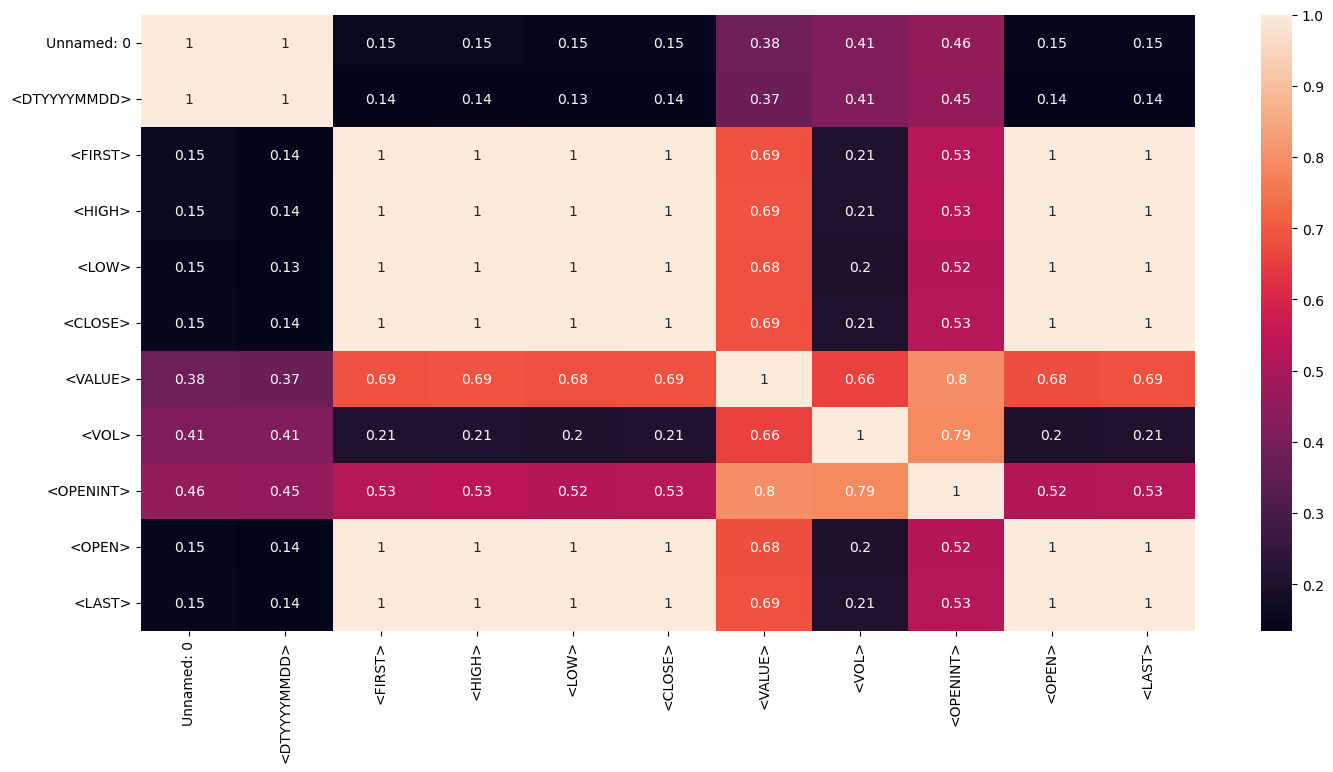

In [5]:
import seaborn as sns
plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(df.corr(), annot = True)

In [6]:
df['datetime'] = pd.to_datetime(df['<DTYYYYMMDD>'], format='%Y%m%d')
df.index = df['datetime']
df.dropna()
df_new = df[["<FIRST>","<HIGH>","<LOW>","<CLOSE>","<VALUE>","<VOL>"]]
df_new.head()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>
datetime,,,,,,
2001-03-25,2140.0,2140.0,2139.0,2140.0,349714320,163488
2001-03-26,2135.0,2136.0,2100.0,2100.0,37030936,17577
2001-03-27,2100.0,2100.0,2045.0,2050.0,200173239,97608
2001-03-28,2049.0,2100.0,2020.0,2100.0,120265895,59019
2001-03-31,2101.0,2205.0,2100.0,2205.0,187171518,85296


In [7]:
df_new.shape

(4087, 6)

In [8]:
#Calculating the change in price
df_new['change_in_price'] = df_new['<CLOSE>'].diff()

C:\Users\win-10\AppData\Local\Temp\ipykernel_13448\1803974385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['change_in_price'] = df_new['<CLOSE>'].diff()


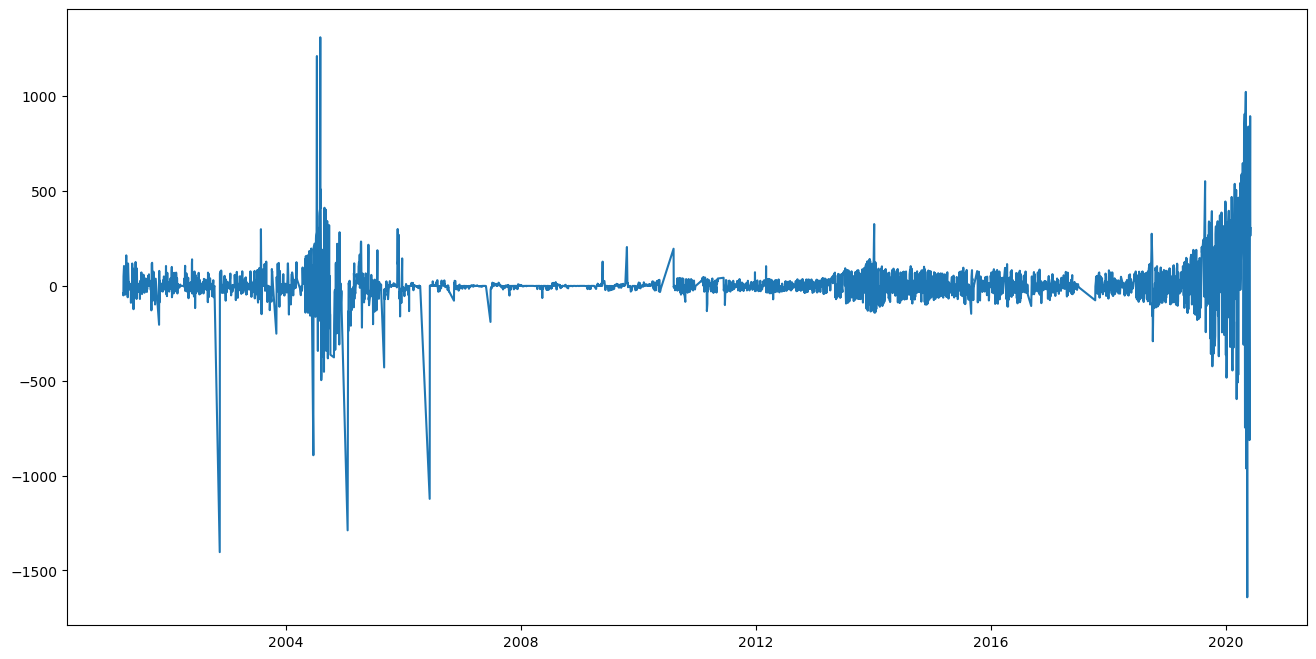

In [9]:
plt.figure(figsize=(16,8))
plt.plot(df_new['change_in_price'], label='Change In Price')

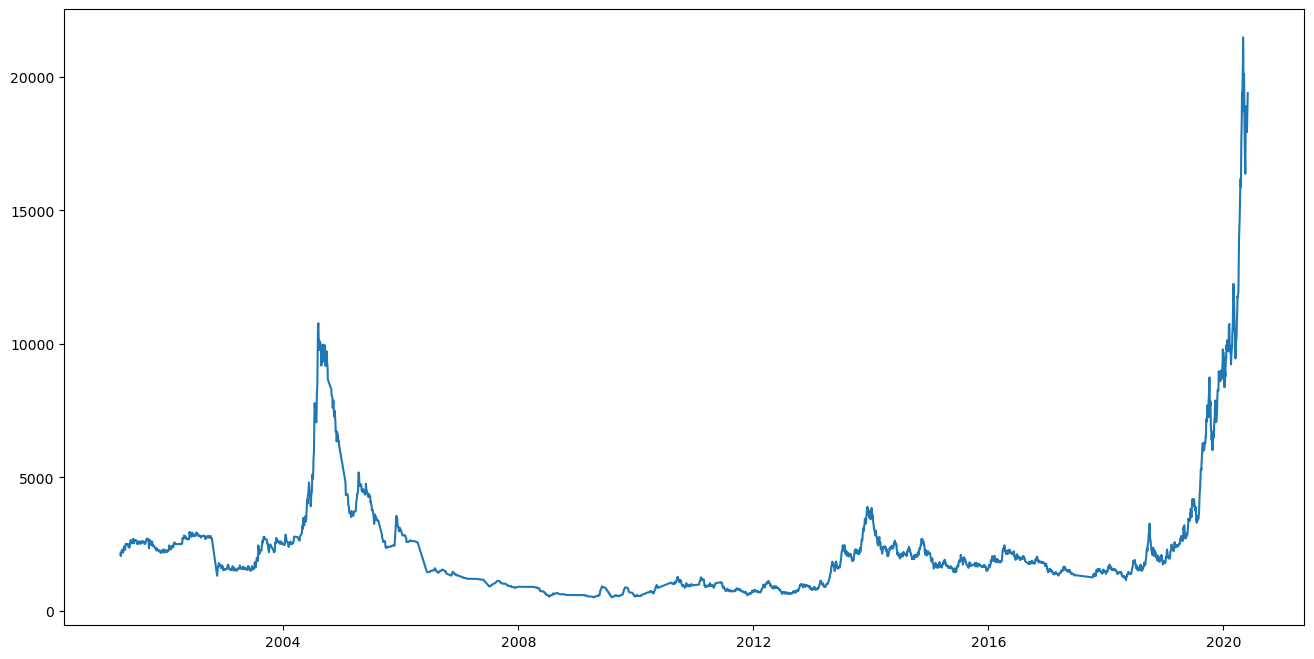

In [10]:
plt.figure(figsize=(16,8))
plt.plot(df_new['<CLOSE>'], label='Close Price history')

In [11]:
#1. Simple n day moving average
#A moving average (MA) is a widely used technical indicator that smooths out price trends by filtering out the “noise” from random short-term price fluctuations.
##The most common applications of moving averages are to identify trend direction and to determine support and resistance levels.
def moving_average(df, n):
    """Calculate the moving average for the given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    MA = pd.Series(df['<CLOSE>'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
    df = df.join(MA)
    return df
df_new = moving_average(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10
datetime,,,,,,,,
2020-05-26,18000.0,18417.0,17960.0,18092.0,41636609960,2316851,-813.0,17926.7
2020-05-27,17186.0,18990.0,17186.0,17928.0,115006593572,6415054,-164.0,17761.4
2020-05-30,18824.0,18824.0,18401.0,18823.0,128426052100,6822804,895.0,17849.8
2020-05-31,17882.0,19690.0,17882.0,19087.0,70489687776,3692994,264.0,18004.2
2020-06-01,19980.0,19997.0,19096.0,19392.0,62242497958,3209736,305.0,18264.2


In [12]:
#2. Weighted Moving Average (WMA)
def weighted_moving_average(df, n):
    """
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    WMA = pd.Series(df['<CLOSE>'].ewm(span=n, min_periods=n).mean(), name='WMA_' + str(n))
    df = df.join(WMA)
    return df
df_new = weighted_moving_average(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10
datetime,,,,,,,,,
2020-05-26,18000.0,18417.0,17960.0,18092.0,41636609960,2316851,-813.0,17926.7,18259.663642
2020-05-27,17186.0,18990.0,17186.0,17928.0,115006593572,6415054,-164.0,17761.4,18199.361162
2020-05-30,18824.0,18824.0,18401.0,18823.0,128426052100,6822804,895.0,17849.8,18312.750041
2020-05-31,17882.0,19690.0,17882.0,19087.0,70489687776,3692994,264.0,18004.2,18453.522761
2020-06-01,19980.0,19997.0,19096.0,19392.0,62242497958,3209736,305.0,18264.2,18624.154986


In [13]:
#3. Momentum
def momentum(df, n):
    """
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    M = pd.Series(df['<CLOSE>'].diff(n), name='MOM_' + str(n))
    df = df.join(M)
    return df
df_new = momentum(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10
datetime,,,,,,,,,,
2020-05-26,18000.0,18417.0,17960.0,18092.0,41636609960,2316851,-813.0,17926.7,18259.663642,-2014.0
2020-05-27,17186.0,18990.0,17186.0,17928.0,115006593572,6415054,-164.0,17761.4,18199.361162,-1653.0
2020-05-30,18824.0,18824.0,18401.0,18823.0,128426052100,6822804,895.0,17849.8,18312.750041,884.0
2020-05-31,17882.0,19690.0,17882.0,19087.0,70489687776,3692994,264.0,18004.2,18453.522761,1544.0
2020-06-01,19980.0,19997.0,19096.0,19392.0,62242497958,3209736,305.0,18264.2,18624.154986,2600.0


In [14]:
#4. Stochastic K%
def stochastic_oscillator_k(df):
    """Calculate stochastic oscillator %K for given data.
    :param df: pandas.DataFrame
    :return: pandas.DataFrame
    """
    SOk = pd.Series((df['<CLOSE>'] - df['<LOW>']) / (df['<HIGH>'] - df['<LOW>']), name='SO_k')
    df = df.join(SOk)
    return df
df_new = stochastic_oscillator_k(df_new)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k
datetime,,,,,,,,,,,
2020-05-26,18000.0,18417.0,17960.0,18092.0,41636609960,2316851,-813.0,17926.7,18259.663642,-2014.0,0.288840
2020-05-27,17186.0,18990.0,17186.0,17928.0,115006593572,6415054,-164.0,17761.4,18199.361162,-1653.0,0.411308
2020-05-30,18824.0,18824.0,18401.0,18823.0,128426052100,6822804,895.0,17849.8,18312.750041,884.0,0.997636
2020-05-31,17882.0,19690.0,17882.0,19087.0,70489687776,3692994,264.0,18004.2,18453.522761,1544.0,0.666482
2020-06-01,19980.0,19997.0,19096.0,19392.0,62242497958,3209736,305.0,18264.2,18624.154986,2600.0,0.328524


In [15]:
#5. Stochastic D%
def stochastic_oscillator_d(df, n):
    """Calculate stochastic oscillator %D for given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    SOk = pd.Series((df['<CLOSE>'] - df['<LOW>']) / (df['<HIGH>'] - df['<LOW>']), name='SO%k')
    SOd = pd.Series(SOk.ewm(span=n, min_periods=n).mean(), name='SO_' + str(n))
    df = df.join(SOd)
    return df
df_new = stochastic_oscillator_d(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k,SO_10
datetime,,,,,,,,,,,,
2020-05-26,18000.0,18417.0,17960.0,18092.0,41636609960,2316851,-813.0,17926.7,18259.663642,-2014.0,0.288840,0.539398
2020-05-27,17186.0,18990.0,17186.0,17928.0,115006593572,6415054,-164.0,17761.4,18199.361162,-1653.0,0.411308,0.516099
2020-05-30,18824.0,18824.0,18401.0,18823.0,128426052100,6822804,895.0,17849.8,18312.750041,884.0,0.997636,0.603680
2020-05-31,17882.0,19690.0,17882.0,19087.0,70489687776,3692994,264.0,18004.2,18453.522761,1544.0,0.666482,0.615102
2020-06-01,19980.0,19997.0,19096.0,19392.0,62242497958,3209736,305.0,18264.2,18624.154986,2600.0,0.328524,0.562985


In [16]:
#6. Relative Strength Index
#Error
"""
def relative_strength_index(df, n):
    Calculate Relative Strength Index(RSI) for given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    i = df.index[0]
    UpI = [0]
    DoI = [0]
    while i + 1 <= df.index[-1]:
        UpMove = float(df.loc[i + 1, 'high']) - float(df.loc[i, 'high'])
        DoMove = float(df.loc[i, 'low']) - float(df.loc[i + 1, 'low'])
        if UpMove > DoMove and UpMove > 0:
            UpD = UpMove
        else:
            UpD = 0
        UpI.append(UpD)
        if DoMove > UpMove and DoMove > 0:
            DoD = DoMove
        else:
            DoD = 0
        DoI.append(DoD)
        i = i + 1
    UpI = pd.Series(UpI)

    DoI = pd.Series(DoI)
    PosDI = pd.Series(UpI.ewm(span=n, min_periods=n).mean())
    NegDI = pd.Series(DoI.ewm(span=n, min_periods=n).mean())

    # rsi = pd.Series(PosDI / (PosDI + NegDI), name='RSI_' + str(n))
    rsi = pd.DataFrame(PosDI / (PosDI + NegDI), columns=['RSI_' + str(n)])
    rsi = rsi.set_index(df.index)
    df = df.join(rsi)
    return df
"""

"\ndef relative_strength_index(df, n):\n    Calculate Relative Strength Index(RSI) for given data.\n    :param df: pandas.DataFrame\n    :param n:\n    :return: pandas.DataFrame\n    i = df.index[0]\n    UpI = [0]\n    DoI = [0]\n    while i + 1 <= df.index[-1]:\n        UpMove = float(df.loc[i + 1, 'high']) - float(df.loc[i, 'high'])\n        DoMove = float(df.loc[i, 'low']) - float(df.loc[i + 1, 'low'])\n        if UpMove > DoMove and UpMove > 0:\n            UpD = UpMove\n        else:\n            UpD = 0\n        UpI.append(UpD)\n        if DoMove > UpMove and DoMove > 0:\n            DoD = DoMove\n        else:\n            DoD = 0\n        DoI.append(DoD)\n        i = i + 1\n    UpI = pd.Series(UpI)\n\n    DoI = pd.Series(DoI)\n    PosDI = pd.Series(UpI.ewm(span=n, min_periods=n).mean())\n    NegDI = pd.Series(DoI.ewm(span=n, min_periods=n).mean())\n\n    # rsi = pd.Series(PosDI / (PosDI + NegDI), name='RSI_' + str(n))\n    rsi = pd.DataFrame(PosDI / (PosDI + NegDI), columns=['R

In [17]:
#7. Signal
def macd(df, n_fast, n_slow):
    """Calculate MACD, MACD Signal and MACD difference
    :param df: pandas.DataFrame
    :param n_fast:
    :param n_slow:
    :return: pandas.DataFrame
    """
    EMAfast = pd.Series(df['<CLOSE>'].ewm(span=n_fast, min_periods=n_slow).mean())
    EMAslow = pd.Series(df['<CLOSE>'].ewm(span=n_slow, min_periods=n_slow).mean())
    MACD = pd.Series(EMAfast - EMAslow, name='MACD_' + str(n_fast) + '_' + str(n_slow))
    MACDsign = pd.Series(MACD.ewm(span=9, min_periods=9).mean(), name='MACDsign_' + str(n_fast) + '_' + str(n_slow))
    MACDdiff = pd.Series(MACD - MACDsign, name='MACDdiff_' + str(n_fast) + '_' + str(n_slow))
    df = df.join(MACD)
    df = df.join(MACDsign)
    df = df.join(MACDdiff)
    return df
df_new = macd(df_new,12,26)
df_new.head()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26
datetime,,,,,,,,,,,,,,,
2001-03-25,2140.0,2140.0,2139.0,2140.0,349714320,163488,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
2001-03-26,2135.0,2136.0,2100.0,2100.0,37030936,17577,-40.0,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
2001-03-27,2100.0,2100.0,2045.0,2050.0,200173239,97608,-50.0,NaN,NaN,NaN,0.090909,NaN,NaN,NaN,NaN
2001-03-28,2049.0,2100.0,2020.0,2100.0,120265895,59019,50.0,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
2001-03-31,2101.0,2205.0,2100.0,2205.0,187171518,85296,105.0,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN


In [18]:
#8. Larry Williams R%
#lEFT

In [19]:
#9. Accumulation / Distribution
def accumulation_distribution(df, n):
    """Calculate Accumulation/Distribution for given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    ad = (2 * df['<CLOSE>'] - df['<HIGH>'] - df['<LOW>']) / (df['<HIGH>'] - df['<LOW>']) * df['<VOL>']
    M = ad.diff(n - 1)
    N = ad.shift(n - 1)
    ROC = M / N
    AD = pd.Series(ROC, name='Acc/Dist_ROC_' + str(n))
    df = df.join(AD)
    return df
df_new = accumulation_distribution(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26,Acc/Dist_ROC_10
datetime,,,,,,,,,,,,,,,,
2020-05-26,18000.0,18417.0,17960.0,18092.0,41636609960,2316851,-813.0,17926.7,18259.663642,-2014.0,0.288840,0.539398,617.206061,951.060144,-333.854083,-0.652602
2020-05-27,17186.0,18990.0,17186.0,17928.0,115006593572,6415054,-164.0,17761.4,18199.361162,-1653.0,0.411308,0.516099,544.399044,869.727924,-325.328879,0.202279
2020-05-30,18824.0,18824.0,18401.0,18823.0,128426052100,6822804,895.0,17849.8,18312.750041,884.0,0.997636,0.603680,552.548544,806.292048,-253.743504,-2.330912
2020-05-31,17882.0,19690.0,17882.0,19087.0,70489687776,3692994,264.0,18004.2,18453.522761,1544.0,0.666482,0.615102,573.696459,759.772930,-186.076471,-1.665997
2020-06-01,19980.0,19997.0,19096.0,19392.0,62242497958,3209736,305.0,18264.2,18624.154986,2600.0,0.328524,0.562985,608.057971,729.429938,-121.371967,-0.668024


In [20]:
#10. Commodity Channel Index
def commodity_channel_index(df, n):
    """Calculate Commodity Channel Index for given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    PP = (df['<HIGH>'] + df['<LOW>'] + df['<CLOSE>']) / 3
    CCI = pd.Series((PP - PP.rolling(n, min_periods=n).mean()) / PP.rolling(n, min_periods=n).std(),
                    name='CCI_' + str(n))
    df = df.join(CCI)
    return df
df_new = commodity_channel_index(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26,Acc/Dist_ROC_10,CCI_10
datetime,,,,,,,,,,,,,,,,,
2020-05-26,18000.0,18417.0,17960.0,18092.0,41636609960,2316851,-813.0,17926.7,18259.663642,-2014.0,0.288840,0.539398,617.206061,951.060144,-333.854083,-0.652602,0.177397
2020-05-27,17186.0,18990.0,17186.0,17928.0,115006593572,6415054,-164.0,17761.4,18199.361162,-1653.0,0.411308,0.516099,544.399044,869.727924,-325.328879,0.202279,0.309628
2020-05-30,18824.0,18824.0,18401.0,18823.0,128426052100,6822804,895.0,17849.8,18312.750041,884.0,0.997636,0.603680,552.548544,806.292048,-253.743504,-2.330912,1.020630
2020-05-31,17882.0,19690.0,17882.0,19087.0,70489687776,3692994,264.0,18004.2,18453.522761,1544.0,0.666482,0.615102,573.696459,759.772930,-186.076471,-1.665997,1.056782
2020-06-01,19980.0,19997.0,19096.0,19392.0,62242497958,3209736,305.0,18264.2,18624.154986,2600.0,0.328524,0.562985,608.057971,729.429938,-121.371967,-0.668024,1.396910


In [21]:
df_new.mean()

<FIRST>            2.314985e+03
<HIGH>             2.354751e+03
<LOW>              2.270215e+03
<CLOSE>            2.315439e+03
<VALUE>            8.081839e+09
<VOL>              2.544001e+06
change_in_price    4.222222e+00
MA_10              2.297528e+03
WMA_10             2.297644e+03
MOM_10             3.948173e+01
SO_k                        NaN
SO_10              5.351231e-01
MACD_12_26         2.610116e+01
MACDsign_12_26     2.537952e+01
MACDdiff_12_26     6.755629e-01
Acc/Dist_ROC_10             NaN
CCI_10            -6.920028e-02
dtype: float64

In [22]:
df_new.min()

<FIRST>             491.000000
<HIGH>              491.000000
<LOW>               491.000000
<CLOSE>             506.000000
<VALUE>            5710.000000
<VOL>                10.000000
change_in_price   -1642.000000
MA_10               515.100000
WMA_10              518.418291
MOM_10            -4300.000000
SO_k                      -inf
SO_10                -4.641678
MACD_12_26         -833.183394
MACDsign_12_26     -759.151369
MACDdiff_12_26     -663.921320
Acc/Dist_ROC_10           -inf
CCI_10               -2.846050
dtype: float64

In [23]:
df_new.max()

<FIRST>            2.200000e+04
<HIGH>             2.250000e+04
<LOW>              2.148200e+04
<CLOSE>            2.148300e+04
<VALUE>            3.370985e+11
<VOL>              8.097697e+07
change_in_price    1.311000e+03
MA_10              2.005040e+04
WMA_10             1.964120e+04
MOM_10             5.604000e+03
SO_k                        inf
SO_10              7.132721e+00
MACD_12_26         2.305244e+03
MACDsign_12_26     2.060763e+03
MACDdiff_12_26     4.236789e+02
Acc/Dist_ROC_10             inf
CCI_10             2.839801e+00
dtype: float64

In [24]:
df_new.std()

<FIRST>            2.370610e+03
<HIGH>             2.423969e+03
<LOW>              2.305411e+03
<CLOSE>            2.366677e+03
<VALUE>            2.214442e+10
<VOL>              4.476661e+06
change_in_price    1.131251e+02
MA_10              2.297954e+03
WMA_10             2.293439e+03
MOM_10             4.988782e+02
SO_k                        NaN
SO_10              3.134283e-01
MACD_12_26         2.073677e+02
MACDsign_12_26     1.981625e+02
MACDdiff_12_26     5.159681e+01
Acc/Dist_ROC_10             NaN
CCI_10             1.264032e+00
dtype: float64

In [25]:
data = (df_new - df_new.mean()) / (df_new.max() - df_new.min())
data.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26,Acc/Dist_ROC_10,CCI_10
datetime,,,,,,,,,,,,,,,,,
2020-05-26,0.729230,0.729804,0.747453,0.752089,0.099540,-0.002805,-0.276743,0.800048,0.834712,-0.207339,NaN,0.000363,0.188344,0.328266,-0.307585,NaN,0.043370
2020-05-27,0.691386,0.755838,0.710580,0.744270,0.317191,0.047804,-0.056967,0.791586,0.831559,-0.170889,NaN,-0.001616,0.165146,0.299423,-0.299747,NaN,0.066626
2020-05-30,0.767540,0.748296,0.768462,0.786936,0.357000,0.052840,0.301652,0.796111,0.837488,0.085270,NaN,0.005823,0.167742,0.276928,-0.233927,NaN,0.191674
2020-05-31,0.723744,0.787644,0.743737,0.799521,0.185132,0.014189,0.087971,0.804015,0.844850,0.151910,NaN,0.006793,0.174481,0.260431,-0.171710,NaN,0.198032
2020-06-01,0.821285,0.801592,0.801571,0.814061,0.160667,0.008221,0.101855,0.817324,0.853773,0.258534,NaN,0.002366,0.185429,0.249671,-0.112217,NaN,0.257852


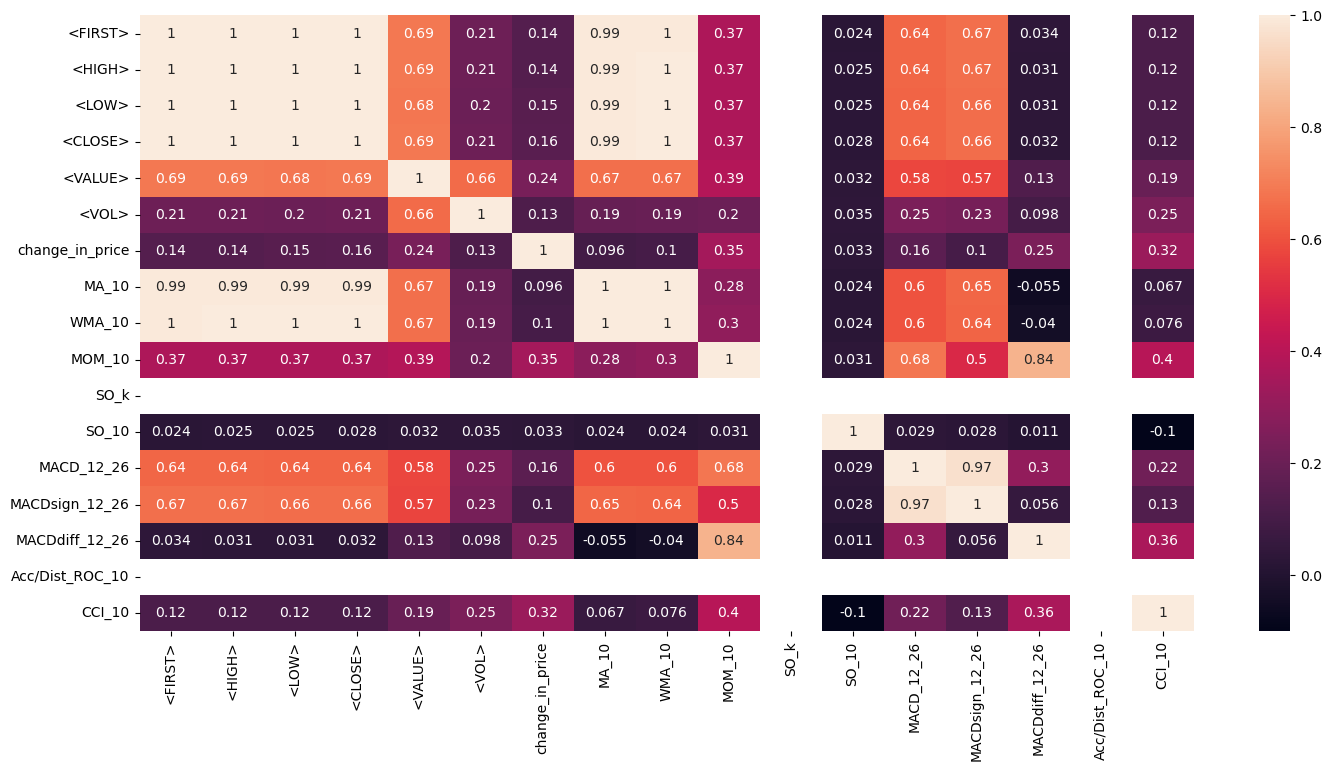

In [26]:
import seaborn as sns
plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(data.corr(), annot = True)

In [27]:
#To check null values
data.isnull().sum()

<FIRST>               0
<HIGH>                0
<LOW>                 0
<CLOSE>               0
<VALUE>               0
<VOL>                 0
change_in_price       1
MA_10                 9
WMA_10                9
MOM_10               10
SO_k               4087
SO_10                 9
MACD_12_26           25
MACDsign_12_26       33
MACDdiff_12_26       33
Acc/Dist_ROC_10    4087
CCI_10               23
dtype: int64

In [28]:
#Removing the null values
data = data.fillna(data.mean())

In [29]:
data = data.dropna(how="all",axis=1)

In [30]:
##Defining the features and labels
X = data.iloc[:,7:]
X.tail()


,MA_10,WMA_10,MOM_10,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26,CCI_10
datetime,,,,,,,,
2020-05-26,0.800048,0.834712,-0.207339,0.000363,0.188344,0.328266,-0.307585,0.043370
2020-05-27,0.791586,0.831559,-0.170889,-0.001616,0.165146,0.299423,-0.299747,0.066626
2020-05-30,0.796111,0.837488,0.085270,0.005823,0.167742,0.276928,-0.233927,0.191674
2020-05-31,0.804015,0.844850,0.151910,0.006793,0.174481,0.260431,-0.171710,0.198032
2020-06-01,0.817324,0.853773,0.258534,0.002366,0.185429,0.249671,-0.112217,0.257852


In [31]:
Y = data.iloc[:,3]
Y.tail()

datetime
2020-05-26    0.752089
2020-05-27    0.744270
2020-05-30    0.786936
2020-05-31    0.799521
2020-06-01    0.814061
Name: <CLOSE>, dtype: float64

In [32]:
X.isnull().sum()

MA_10             0
WMA_10            0
MOM_10            0
SO_10             0
MACD_12_26        0
MACDsign_12_26    0
MACDdiff_12_26    0
CCI_10            0
dtype: int64

array([[<Axes: title={'center': 'MA_10'}>,
        <Axes: title={'center': 'WMA_10'}>,
        <Axes: title={'center': 'MOM_10'}>],
       [<Axes: title={'center': 'SO_10'}>,
        <Axes: title={'center': 'MACD_12_26'}>,
        <Axes: title={'center': 'MACDsign_12_26'}>],
       [<Axes: title={'center': 'MACDdiff_12_26'}>,
        <Axes: title={'center': 'CCI_10'}>, <Axes: >]], dtype=object)

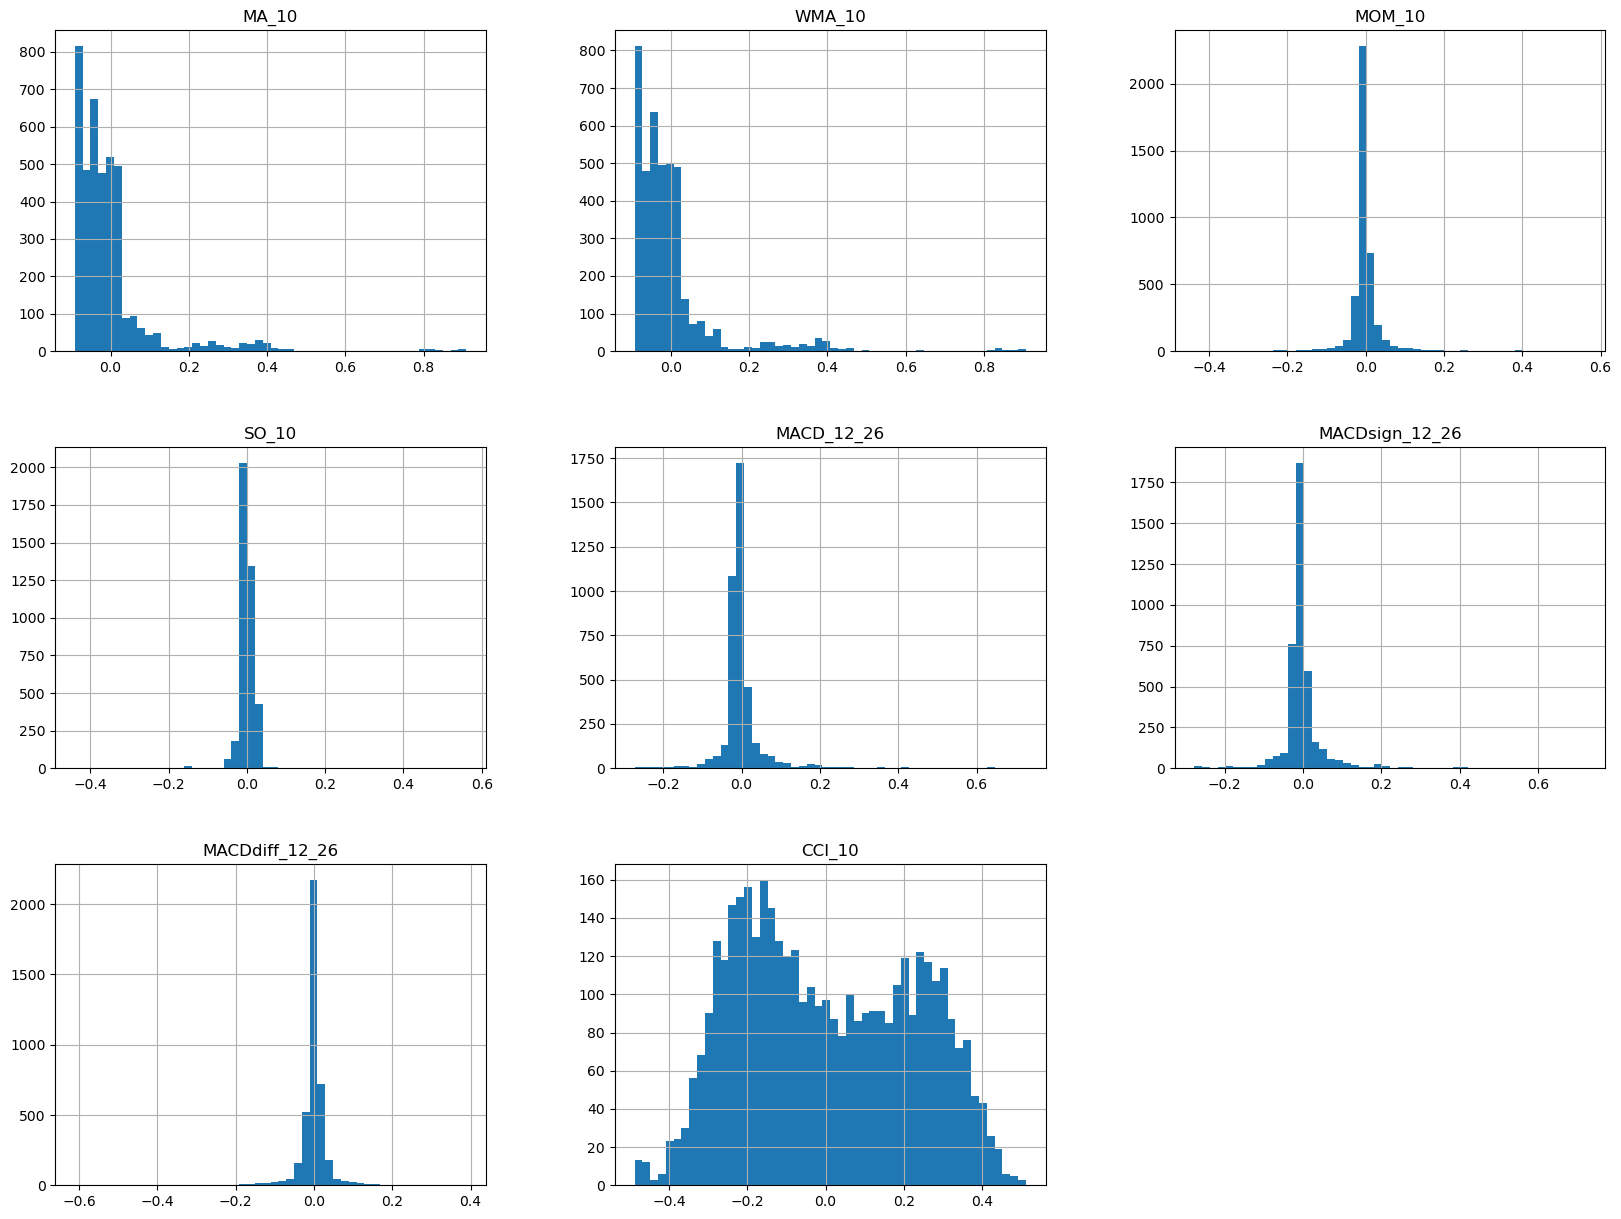

In [33]:
X.hist(bins=50,figsize=(20,15))

In [34]:
#Splitting data into training and test set
#from sklearn.model_selection import train_test_split
total_days = len(X)
hold_days=30
x_train = X[0:(total_days-hold_days)]
y_train = Y[0:(total_days-hold_days)]

In [35]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
Regressor = DecisionTreeRegressor(max_depth=10)
Regressor.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10)

In [36]:
y_pred = Regressor.predict(X)
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(Y,y_pred)
rmse = np.sqrt(mse)
rmse

0.013230522384451923

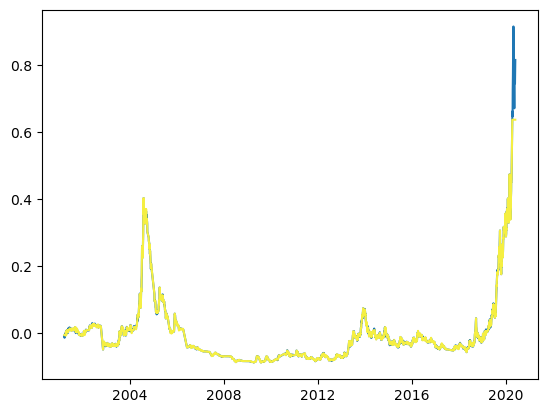

In [37]:
plt.plot(X.index,Y)
plt.plot(X.index, y_pred, c='#f5ef42')
plt.show()

In [38]:
#import necessary libraries
from sklearn.ensemble import BaggingRegressor

In [39]:
regr = BaggingRegressor(base_estimator=Regressor,
n_estimators=50, random_state=0)
regr.fit(x_train,y_train)

C:\Users\win-10\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                 n_estimators=50, random_state=0)

In [40]:
y_pred_br = regr.predict(X)

In [41]:
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(Y,y_pred_br)
rmse = np.sqrt(mse)
rmse

0.01828914357903191

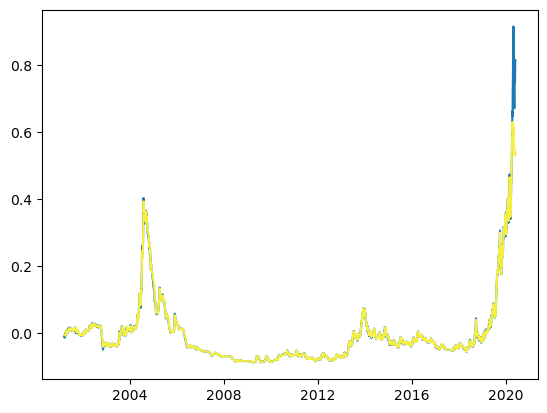

In [42]:
plt.plot(X.index,Y)
plt.plot(X.index, y_pred_br, c='#f5ef42')
plt.show()

In [43]:
#importing the libraries
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50,max_depth=10,random_state=1)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=50, random_state=1)

In [44]:
y_pred_rf = rf.predict(X)

In [45]:
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(Y,y_pred_rf)
rmse = np.sqrt(mse)
rmse

0.019200717806136414

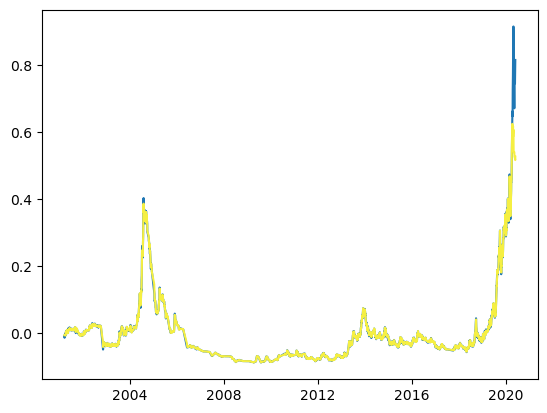

In [46]:
plt.plot(X.index,Y)
plt.plot(X.index, y_pred_rf, c='#f5ef42')
plt.show()

In [47]:
#importing necessary libraries
from sklearn.ensemble import AdaBoostRegressor
adb_reg = AdaBoostRegressor(base_estimator=Regressor,n_estimators=100,learning_rate=0.1)
adb_reg.fit(x_train,y_train)

C:\Users\win-10\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                  learning_rate=0.1, n_estimators=100)

In [48]:
y_pred_adb = adb_reg.predict(X)
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(Y,y_pred_adb)
rmse = np.sqrt(mse)
rmse

0.017252202619967773

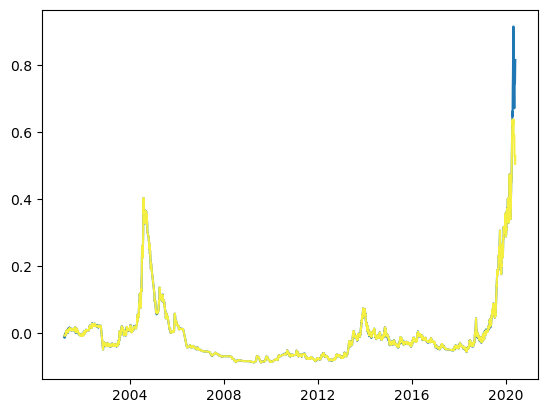

In [49]:
plt.plot(X.index,Y)
plt.plot(X.index, y_pred_adb, c='#f5ef42')
plt.show()

In [50]:
#importing necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
gdbt = GradientBoostingRegressor(max_depth=10,learning_rate=0.1,n_estimators=50,random_state=1)
gdbt.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=10, n_estimators=50, random_state=1)

In [51]:
y_pred_gdbt = gdbt.predict(X)
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(Y,y_pred_gdbt)
rmse = np.sqrt(mse)
rmse

0.01815522692515844

In [52]:
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import keras 
from keras.models import Sequential 
from keras.layers import Dense 
from sklearn.metrics import confusion_matrix 

In [53]:
from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [54]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X_train_scaled = sc.fit_transform(x_train)

In [55]:
X_train, Y_train = np.array(x_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [56]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [57]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, Y_train, epochs = 15, batch_size = 32)

Epoch 1/15
127/127 [==============================] - 9s 17ms/step - loss: 0.0012
Epoch 2/15
127/127 [==============================] - 2s 18ms/step - loss: 2.8564e-04
Epoch 3/15
127/127 [==============================] - 3s 22ms/step - loss: 2.3790e-04
Epoch 4/15
127/127 [==============================] - 3s 22ms/step - loss: 2.3904e-04
Epoch 5/15
127/127 [==============================] - 3s 20ms/step - loss: 3.0230e-04
Epoch 6/15
127/127 [==============================] - 3s 21ms/step - loss: 2.4372e-04
Epoch 7/15
127/127 [==============================] - 2s 18ms/step - loss: 2.1698e-04
Epoch 8/15
127/127 [==============================] - 3s 20ms/step - loss: 2.2046e-04
Epoch 9/15
127/127 [==============================] - 2s 17ms/step - loss: 2.1767e-04
Epoch 10/15
127/127 [==============================] - 2s 17ms/step - loss: 1.7105e-04
Epoch 11/15
127/127 [==============================] - 2s 19ms/step - loss: 2.3917e-04
Epoch 12/15
127/127 [==============================] - 2

In [58]:
X_test = np.array(X)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)

128/128 [==============================] - 2s 5ms/step


In [59]:
real_stock_price = np.asarray(Y)
# real_stock_price=real_stock_price.reshape(1167,1)

In [60]:
predicted_stock_price

array([[-4.5406632e-04],
       [-4.5406632e-04],
       [-4.5406632e-04],
       ...,
       [ 6.5487659e-01],
       [ 6.6541708e-01],
       [ 6.8082106e-01]], dtype=float32)

In [61]:
real_stock_price

array([-0.0083634 , -0.01027025, -0.01265381, ...,  0.78693622,
        0.79952143,  0.81406116])

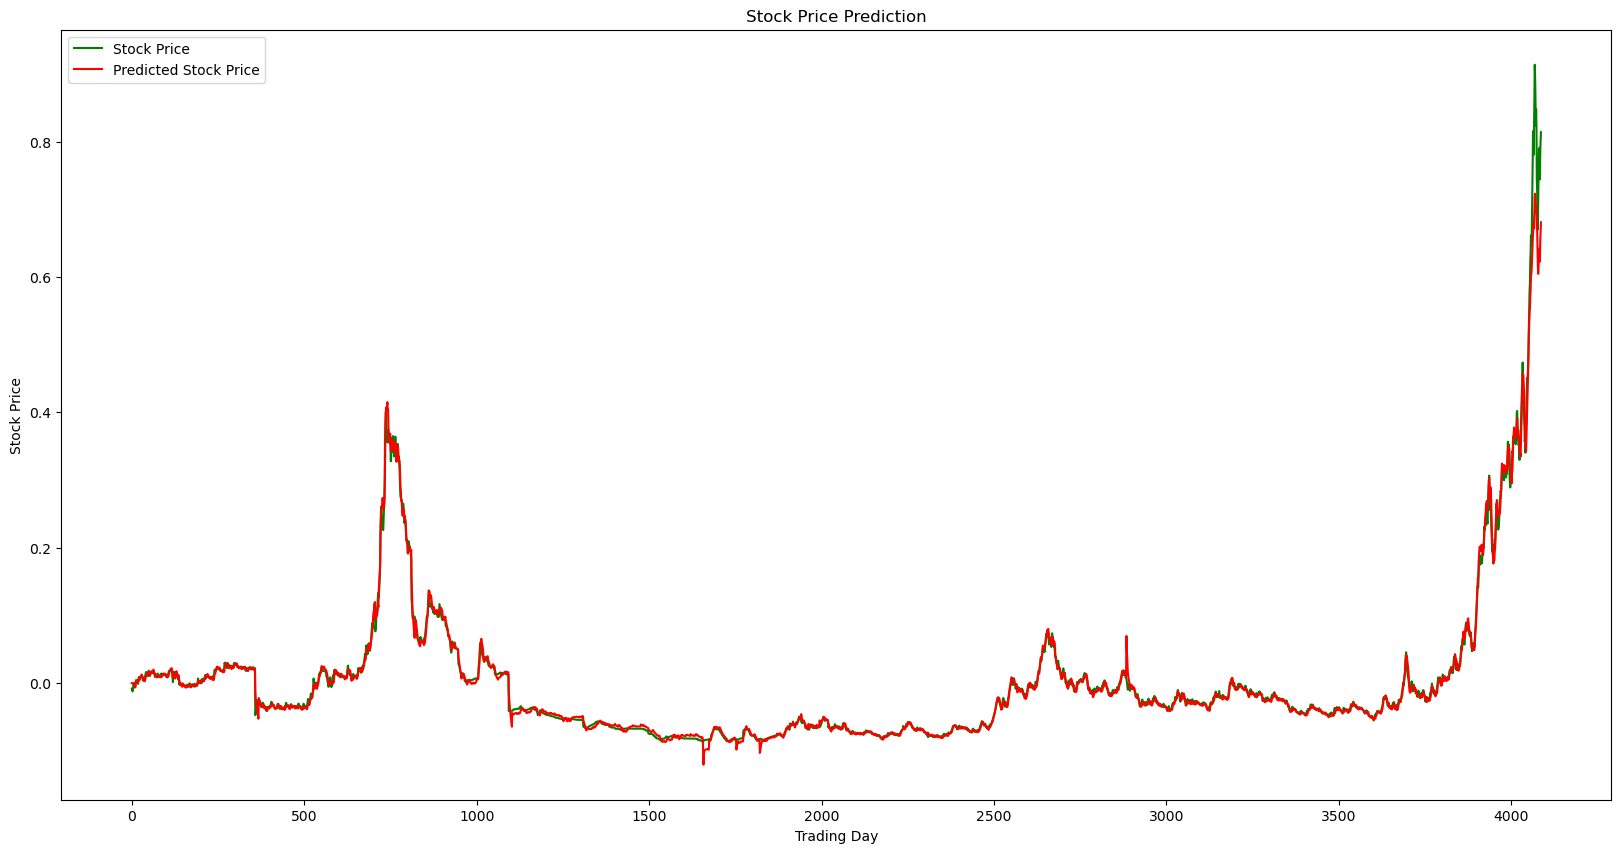

In [62]:
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [63]:
from sklearn.metrics import mean_squared_error as MSE
rmse = MSE(real_stock_price,predicted_stock_price)**(1/2)
rmse

0.012128336750270608